# *A Simple Autoencoder*

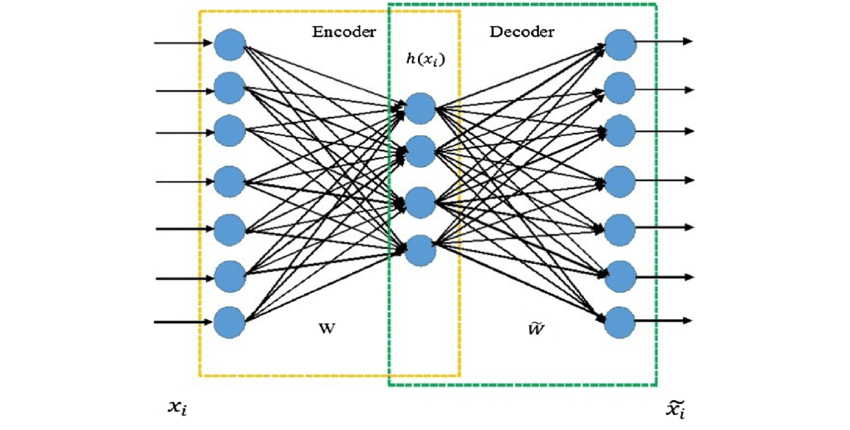

## *Importing the Libraries*

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as ks
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## *Generating the data for simple autoencoders*

In [2]:
def generate_data(m):
    angles = np.random.randn(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:, 1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m)
    data[:, 2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    return data

## *Visualizing the generated data*

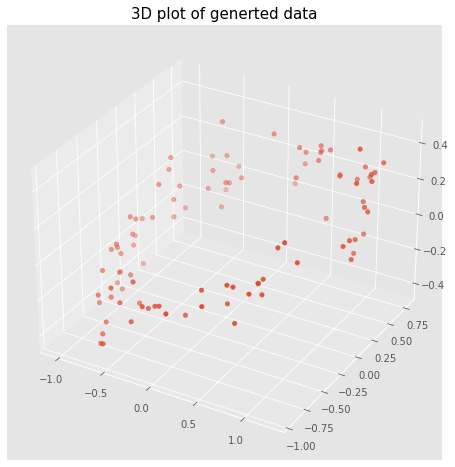

In [3]:
x_train = generate_data(100)
x_train = x_train - x_train.mean(axis=0, keepdims=0)

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(x_train[:, 0], x_train[:, 1], x_train[:, 2])
plt.title('3D plot of generted data', fontsize=15)
plt.show()

## *Lets create a simple autoencoders with a single encoding and decoding layer*
## *Training the autoencoder with the generated data* 

In [4]:
encoder = ks.models.Sequential([ks.layers.Dense(2, input_shape=[3])])
decoder = ks.models.Sequential([ks.layers.Dense(3, input_shape=[2])])


autoencoder = ks.models.Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer=ks.optimizers.SGD(lr=0.1))
history = autoencoder.fit(x_train, x_train, epochs=200, verbose=0)

## *encoding the data here is to convert the generated 3D data into a 2D data*

In [5]:
codings = encoder.predict(x_train)

print(f'input point: {x_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [-0.60911192 -0.69354497 -0.2466049 ]
encoded point: [0.24336344 0.87051475]


## *lets see how our encoded 2D data looks*

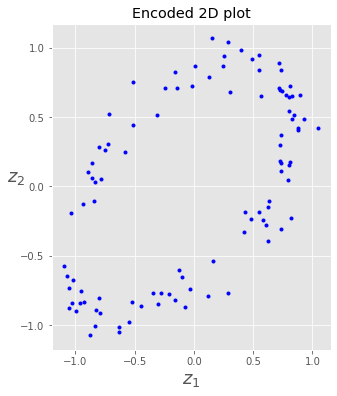

In [6]:
fig = plt.figure(figsize=(5, 6))
plt.plot(codings[:, 0], codings[:, 1], 'b.')
plt.title('Encoded 2D plot')
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## *The Decoder converts the 2D data from the encoder back to 3D data*

In [7]:
decodings = decoder.predict(codings)

print(f'input point: {x_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [-0.60911192 -0.69354497 -0.2466049 ]
encoded point: [0.24336344 0.87051475]
decoded point: [-0.60056627 -0.7076437  -0.26761982]


## *Visualizing the autoencoders output(last layer output(Decoder output(the 3D data)) with the generated 3D data*

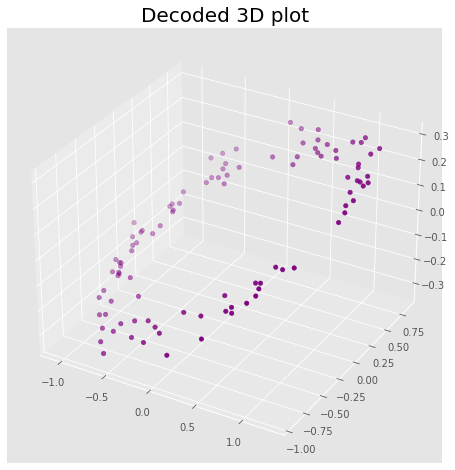

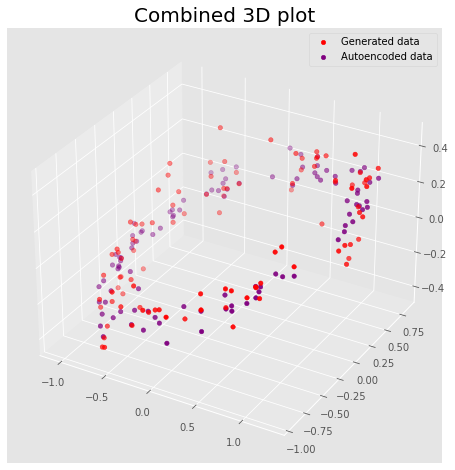

In [19]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], color='purple')
plt.title('Decoded 3D plot', fontsize=20)
plt.show()

'''
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(x_train[:, 0], x_train[:, 1], x_train[:, 2], color='red')
plt.title('Original 3D plot')
plt.show()
'''

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(x_train[:, 0], x_train[:, 1], x_train[:, 2], color='red', label='Generated data')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], color='purple', label='Autoencoded data')
plt.title('Combined 3D plot', fontsize=20)
plt.legend()
plt.show()
